# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import pandas as pd
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
valCount = pd.Series(train['labels']).value_counts()
n_classes = len(valCount)
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

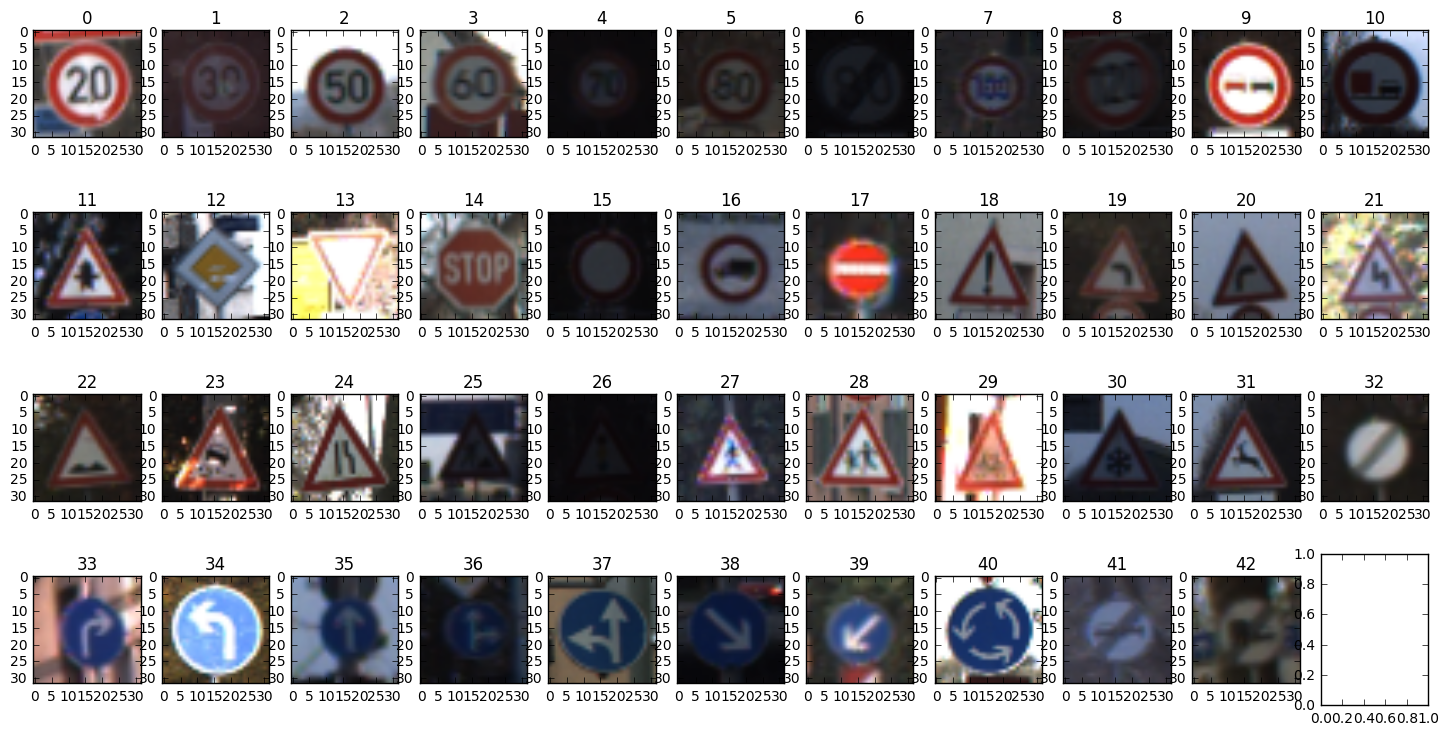

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
np.random.seed(0)
# Visualizations will be shown in the notebook.
%matplotlib inline
#Change default size of figures:
plt.rcParams["figure.figsize"] = (18,9)

arr = list(range(max(train['labels'])+1))


# Loop through the pictures to get an intuition for the example.
# This was as well used to build the name dictionary.
# next time I read till the end of the instruction to find the .csv file :D
xTrain, yTrain = shuffle(train['features'], train['labels'], random_state = 0)
f, axis = plt.subplots(nrows=4, ncols=11)

for i in range(len(xTrain)):
    if(len(arr)==0): 
        break
    if(yTrain[i] in arr):
        axis[yTrain[i]//11, yTrain[i]%11].set_title("%d" % yTrain[i])
        axis[yTrain[i]//11, yTrain[i]%11].imshow(xTrain[i])
        arr.remove(yTrain[i])



In [4]:
#Build a dictonary to get strings instead of numbers for the next plot
trafficSignDict = {
    0: "Speed Limit 20",
    1: "Speed Limit 30",
    2: "Speed Limit 50",
    3: "Speed Limit 40",
    4: "Speed Limit 70",
    5: "Speed Limit 80",
    6: "Lift Speed Limit 80",
    7: "Speed Limit 100",
    8: "Speed Limit 120",
    9: "Overtaking Forbidden",
    10: "Overtaking Forbidden Lorries",
    11: "Right Of Way Now",
    12: "Right Of Way Street",
    13: "Give Way",
    14: "Stop",
    15: "Drive-Through Forbidden",
    16: "Lorries Forbidden",
    17: "Entering Forbidden",
    18: "Attention",
    19: "Sharp Curve Left",
    20: "Sharp Curve Right",
    21: "Multiple Sharpe Curves",
    22: "Bumps",
    23: "Slippy Road",
    24: "Road Narrows",
    25: "Roadworks",
    26: "Traffic Light",
    27: "Pedestrians",
    28: "Children Playing",
    29: "Cyclists",
    30: "Frost",
    31: "Game Pass",
    32: "All Restrictions Lifted",
    33: "Go Right",
    34: "Go Left",
    35: "Go Straight",
    36: "Go Straight or Right",
    37: "Go Straight or Left",
    38: "Go Right Around Obstacle",
    39: "Go Left Around Obstacle",
    40: "Roundabout",
    41: "Overtaking allowed again",
    42: "Lorries are allowed to overtake again"
    }

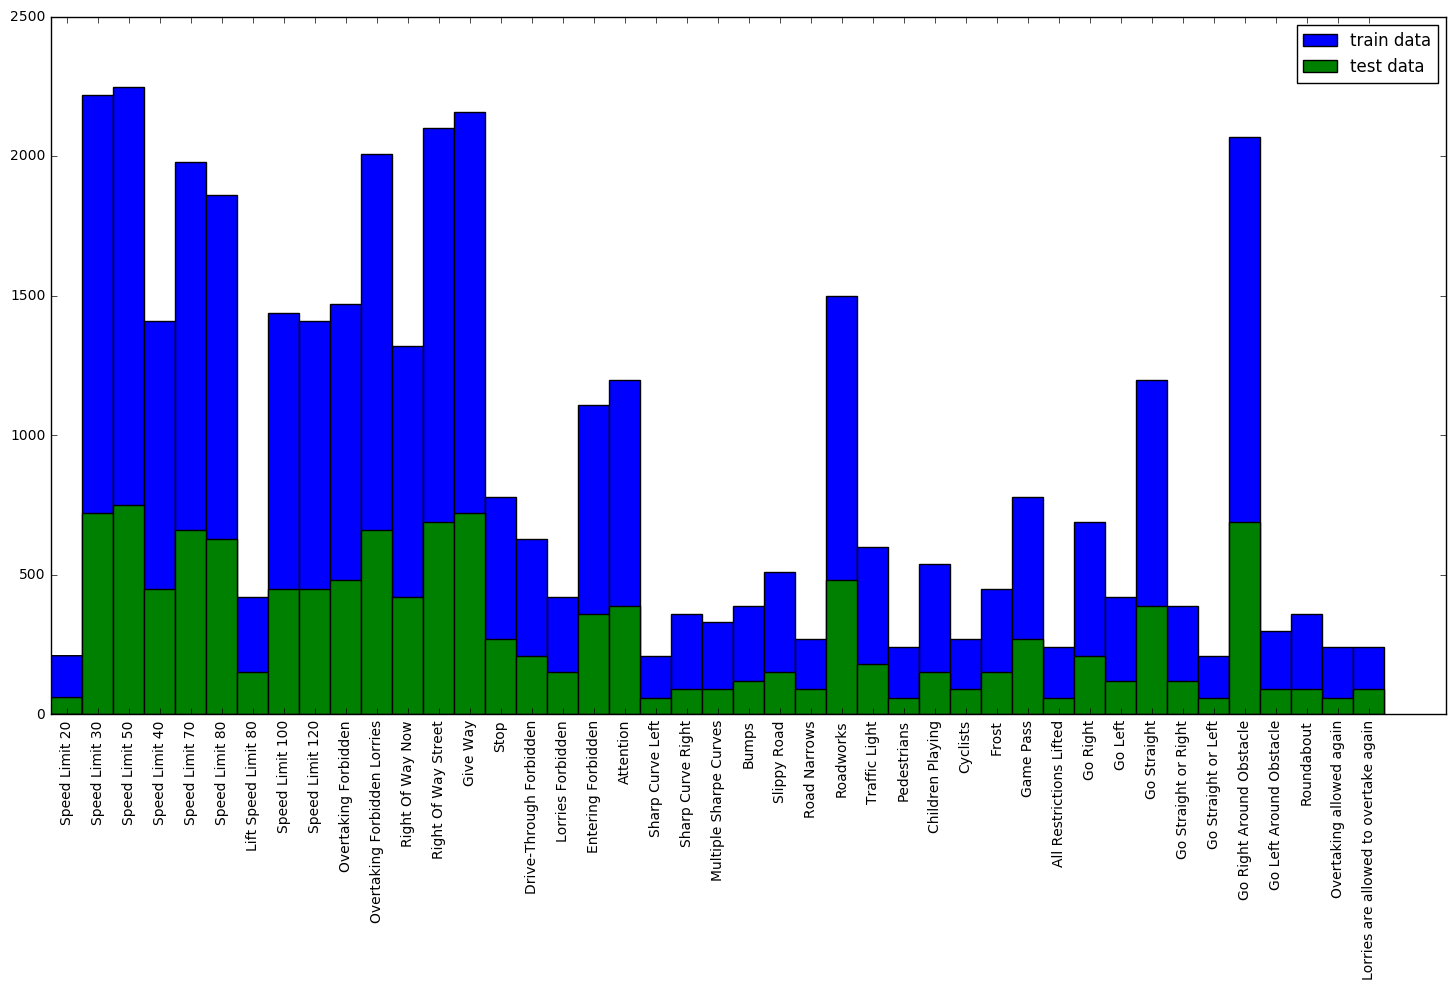

In [5]:
arr = list(range(max(train['labels'])+1))
ticks = [trafficSignDict[i] for i in arr]
ticks.append('')
arr = np.array(arr) + .5
plt.hist(train['labels'], bins=np.arange(0,44, 1), label = 'train data')
plt.hist(test['labels'], bins=np.arange(0,44, 1), label='test data')
plt.xticks(arr, ticks, rotation=90)
plt.legend()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
import cv2
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#Check min and max before processing (should be 0,255)

def minValImage(arr, channel = 0):
    return np.min(np.min(np.min(arr[:,:,:,channel], axis=1),axis=1),axis=0)

def maxValImage(arr, channel = 0):
    return np.max(np.max(np.max(arr[:,:,:,channel], axis=0),axis=0),axis=0)

def addGreyLayer(arr):
    return np.concatenate((arr, [cv2.cvtColor(data, cv2.COLOR_RGB2GRAY).reshape((32,32,1)) for data in arr]), axis=3)

def applyNormalisation(arr):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    arr[:,:,:,3] = np.array([clahe.apply(img) for img in arr[:,:,:,3]])
    arr = np.array([2.*(img[:,:] - np.min(np.min(img,axis=0), axis=0))[:,:]/
          (np.max(np.max(img,axis=0), axis=0)-np.min(np.min(img,axis=0), axis=0)) -1 for img in arr])
    return arr

def preprocessImages(arr):
    arr = addGreyLayer(arr)
    arr = applyNormalisation(arr)
    return arr
    
    
xTest = test['features']
yTest = test['labels']
print("Train Red Min %g Max: %g" % (minValImage(xTrain), maxValImage(xTrain)))
print("Test Red Min: %g Max: %g" % (minValImage(xTest), maxValImage(xTest)))
xTrain = preprocessImages(xTrain)
xTest = preprocessImages(xTest)


Train Red Min 0 Max: 255
Test Red Min: 0 Max: 255


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
A greyscale layer is added as a fourth channel and transformed using a CLAHE filter.

In addition, the data were normalised to provide a mean of 0 and a deviation of 1. This provides the network with an easy to handle representation of the data

In [7]:
from sklearn.model_selection import train_test_split
def shiftImg(arr, horizontal, vertical):
    arr = arr.copy()
    if(horizontal>0):arr = np.concatenate((arr[horizontal:,:],np.zeros((horizontal,arr.shape[1],arr.shape[2]))), axis=0)
    elif(horizontal<0):arr = np.concatenate((np.zeros((np.abs(horizontal),arr.shape[1],arr.shape[2])), arr[:horizontal,:]), axis=0)
    if(vertical>0):arr = np.concatenate((arr[:,vertical:],np.zeros((arr.shape[0],vertical,arr.shape[2]))), axis=1)
    elif(vertical<0):arr = np.concatenate((np.zeros((arr.shape[0], np.abs(vertical),arr.shape[2])), arr[:,:vertical]), axis=1)
    return arr

def shiftImages(arr):
    randomJumps = np.random.randint(-2,2+1, (len(arr),2)) # determine shifts of the pictures randomly
    shiftedArr = [shiftImg(arr[i], randomJumps[i][0], randomJumps[i][1]) for i in range(len(arr))] #shifting the pictures
    return shiftedArr

def scaleImages(arr):
    randomJumps = np.random.randint(-2,2+1, len(arr))*2
    smallerImgs = np.zeros(arr.shape)
    for i in range(len(arr)):
        pixels = randomJumps[i]
        if(pixels<0):
            pixels = pixels*-1
            smallerImgs[i][pixels//2:-pixels//2,pixels//2:-pixels//2] = cv2.resize(arr[i], (32-pixels,32-pixels)) #make image smaller
        elif(pixels>0):
            smallerImgs[i] = cv2.resize(arr[i], (32+pixels,32+pixels))[pixels//2:-pixels//2,pixels//2:-pixels//2]
        else:
            smallerImgs[i] = arr[i]
    return smallerImgs

def rotateImages(arr):
    randomJumps = np.random.randint(-5,6, len(arr))
    rotations = [cv2.getRotationMatrix2D((arr[0].shape[0]/2, arr[0].shape[1]/2), jump, 1) for jump in randomJumps]
    arr = [cv2.warpAffine(img, M, (img.shape[1], img.shape[0])) for img, M in zip(arr, rotations)]
    return arr

shiftedImgs = shiftImages(xTrain)
smallerImgs = scaleImages(xTrain)
rotImages = rotateImages(xTrain)
xTrain = np.concatenate((xTrain, shiftedImgs, smallerImgs, rotImages) , axis=0)
yTrain = np.concatenate((yTrain, yTrain, yTrain, yTrain), axis=0)


xTrain, xValidation, yTrain, yValidation = train_test_split(xTrain, yTrain, random_state = 42, test_size = 0.2)


Train Min: -1 Max: 1
Test Min: -1 Max: 1


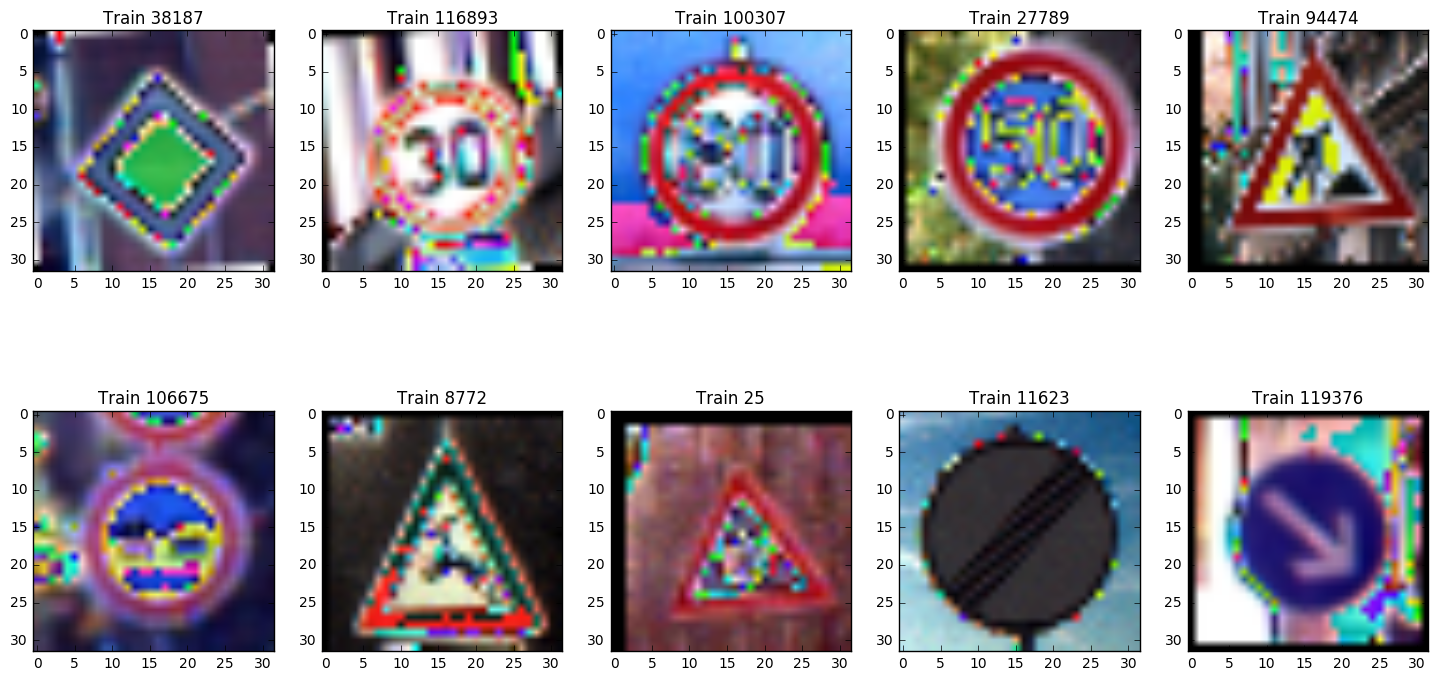

In [8]:
#Check min and max after processing (should by -1,1)
print("Train Min: %g Max: %g" % (minValImage(xTrain), maxValImage(xTrain)))
print("Test Min: %g Max: %g" % (minValImage(xTest), maxValImage(xTest)))

# Look at some sample images to make sure nothing went wrong.
# Don't look at the colour as the values are right but matplotlib 
# does not like value between -1 and 1
indices = np.random.randint(0,len(xTrain), 10)
f, axis = plt.subplots(nrows=2, ncols=5)
for i in range(len(indices)):
        axis[i//5, i%5].set_title("Train %d" % indices[i])
        axis[i//5, i%5].imshow(xTrain[indices[i]][:,:,:3])

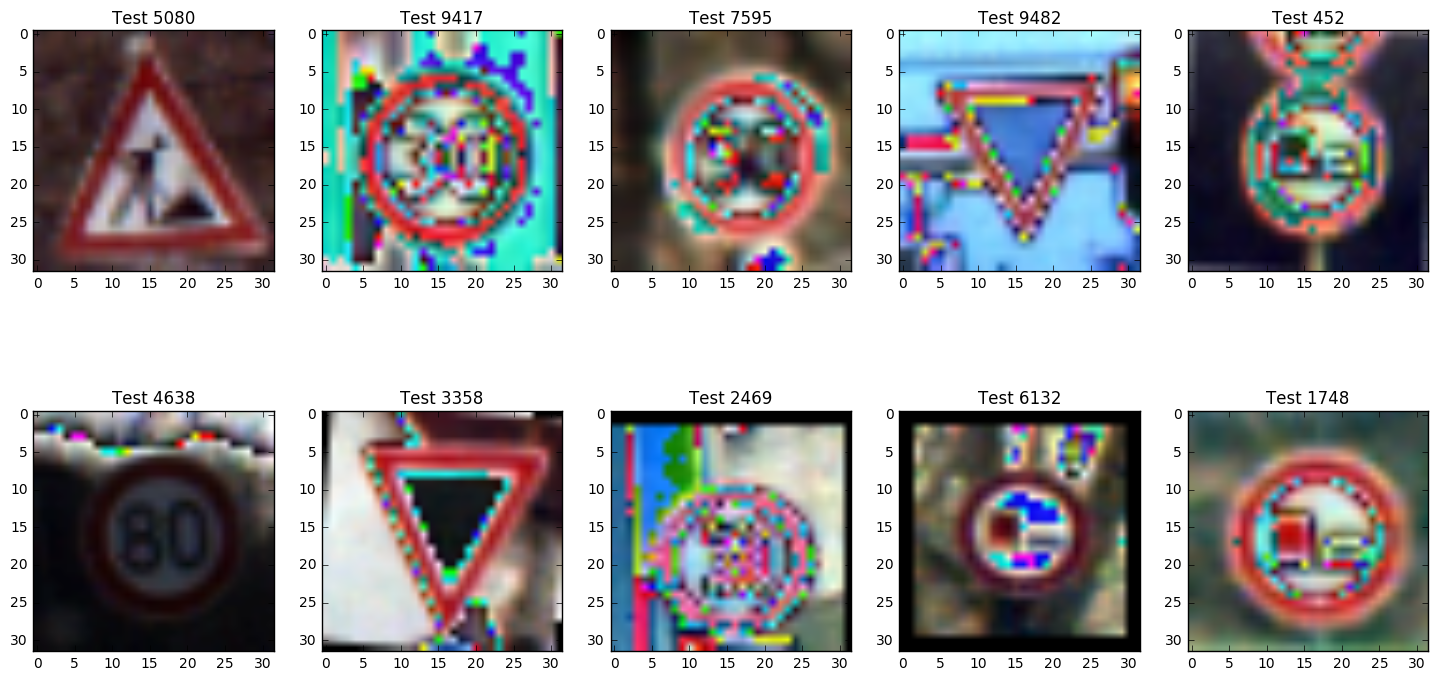

In [9]:
#Look at the test set as well
indices = np.random.randint(0,len(xTest), 10)
f, axis = plt.subplots(nrows=2, ncols=5)
for i in range(len(indices)):
        axis[i//5, i%5].set_title("Test %d" % indices[i])
        axis[i//5, i%5].imshow(xTrain[indices[i]][:,:,:3])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The pictures were augmented by applying a random shift of ±6% of the original pictures, as well a random scaling ±12% and random rotation ±5°.
Afterwards, the data were split into train and validation using the train_test_split from sklearn, a tested and validated function to provide random train set splits. Hereby, I used a test set of 20% of the training data for validation. This provides an accurate estimate of the test probability without cutting to much data from the training set. Furthermore, a change of 0.1% in the validation accuracy is approximately statistically significant. This is low enough for easy training, while keeping enough data for training.
I tried as well the StratifiedShuffleSplit. However, training more models would be computationally to expensive. The other approach would be to change the split on every new stochastic training. This leads however to leaking validation information into the training data and is there fore not reasonable to choose.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

'''
Created on 30 Jan 2017

@author: Jendrik
'''

import tensorflow as tf
import numpy as np

class CNN(object):
    """
        A class to easily build a convolutional neural network with 2 convolutional layers and 
        three fully connected ones.
    """
    

    def __init__(self, shapeOfInput, numberOfOutputs, layers):
        """
            The constructor for the CNN
            
            Variables:
                shapeOfInput - the shape of the input data
                numberOfOutputs - the number of outputs the network shall provide
                convKind - the kind of convolution, which shall be used
        """
        self.weights = {}
        self.biases = {}
        self.x = tf.placeholder(tf.float32, shape=[None, shapeOfInput[0], shapeOfInput[1], shapeOfInput[2]], name='x')
        self.keepProb = tf.placeholder(tf.float32, name='keepProb')
        # Build a weight variable for the convolution
        # in this case every 5x5 patch from the sound is taken
        # and converted in to 32 output channels
        
        lenOut = 16
        # Build a bias for the convolution to keep all relus active at the beginning
        
        # reshape x to a four dimensional tensor
        # First dimension all the sounds
        # second frequency and third dimension time
        hPool=None
        outs=[]
        assert(lenOut*2%4 == 0)
        for i in range(len(layers)):
            bConv = self.biasVariable([lenOut*2], name='bConv%g'%i)
            self.biases.update({'bConv%g'%i:bConv})
            if(layers[i] == '5x5'):
                if(hPool==None):
                    wConv1 = self.weightVariable([5,5, shapeOfInput[2], lenOut*2], name='wConv%g'%i)
                    self.weights.update({'wConv%g'%i:wConv1})
                    hConv = self.conv2D(self.x, wConv1, 'VALID') + bConv
                else: 
                    wConv1 = self.weightVariable([5,5, lenOut, lenOut*2], name='wConv%g'%i)
                    self.weights.update({'wConv%g'%i:wConv1})
                    hConv = self.conv2D(hPool, wConv1, 'VALID') + bConv
                hConv = tf.nn.relu(hConv, name='hConv%g'%i)
                hPool = tf.nn.max_pool(hConv, ksize=[1,3,3,1], strides=[1,3,3,1], padding='VALID', name='hPool%g'%i)
                lenOut*=2
            elif(layers[i] == 'inception'):
                weights=[]
                weights.append(self.weightVariable([1,1, lenOut, lenOut*2//4], name='wConvPre5x5%g'%i))
                weights.append(self.weightVariable([5,5, lenOut*2//4, lenOut*2//4], name='wConv5x5%g'%i))
                weights.append(self.weightVariable([1,1, lenOut, lenOut*2//4], name='wConvPre3x3%g'%i))
                weights.append(self.weightVariable([3,3, lenOut*2//4, lenOut*2//4], name='wConv3x3%g'%i))
                weights.append(self.weightVariable([1,1, lenOut, lenOut*2//4], name='wConv1x1%g'%i))
                weights.append(self.weightVariable([1,1, lenOut, lenOut*2//4], name='wConvavgPool%g'%i))
                weights.append(self.weightVariable([1,1, lenOut, lenOut*2//4], name='wConvPastAvg%g'%i))
                biases = []
                biases.append(self.biasVariable([lenOut*2//4], name='bConvInner5x5%g'%i))
                biases.append(self.biasVariable([lenOut*2//4], name='bConvInner3x3%g'%i))
                self.weights.update({'wConv%g'%i:weights})
                hConv = self.inception(hPool, weights, biases) + bConv
                hPool = tf.nn.relu(hConv, name='hConv%g'%i)
                lenOut*=2
                outs.append(hPool)
        
        neurons = []
        for pool in outs:
            numberOfNeurons = int(pool.get_shape()[1]*pool.get_shape()[2]*pool.get_shape()[3])
            neurons.append(tf.reshape(pool, [-1, numberOfNeurons]))
        hPoolEnd = tf.concat(1, neurons)
        wFC1 = self.weightVariable([int(hPoolEnd.get_shape()[1]), 1024], name='wFC1')
        bFC1 = self.biasVariable([1024], name='bFC1')
        self.weights.update({'wFC1':wFC1})
        self.biases.update({'bFC1':bFC1})
        hFC1 = tf.nn.relu(tf.matmul(hPoolEnd, wFC1) + bFC1, name='hFC1')
        
        hFC1Drop = tf.nn.dropout(hFC1, self.keepProb)
        # Build the readout layer:
        wFC3 = self.weightVariable([1024, numberOfOutputs], name='wFC3')
        bFC3 = self.biasVariable([numberOfOutputs], name='bFC3')
        self.weights.update({'wFC3':wFC3})
        self.biases.update({'bFC3':bFC3})
        self.out = tf.matmul(hFC1Drop, wFC3) + bFC3
        
    
    def weightVariable(self, shape, name=''):
        """
            Builds a weight variable with the given shape
        """
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial, name=name)

    def biasVariable(self, shape, name=''):
        """
            Builds a bais variable with the given shape
        """
        initial = tf.constant(0.1, shape = shape)
        return tf.Variable(initial, name=name)
    
    def inception(self,x,weights,biases):
        conv5x5 = self.conv2D(self.conv2D(x, weights[0]), weights[1]) + biases[0]
        conv3x3 = self.conv2D(self.conv2D(x, weights[2]), weights[3]) + biases[1]
        conv = tf.nn.relu(self.conv2D(x, weights[4]))
        avg = tf.nn.avg_pool(x, ksize=[1,3,3,1], strides= [1,1,1,1], padding='SAME') 
        avgConv = self.conv2D(avg, weights[5])
        out = tf.concat(3, [conv5x5, conv3x3, conv, avgConv])
        return out 
    
    def conv2D(self, x, W, padding='SAME'):
        return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding=padding)

    def maxPool2X2(self, x, name):
        return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID', name=name)
        
    def encodeIndices(self, indices):
        """
            convert indices to one-hot-encoded vectors
            Variables:
                indices - the indices which shall be one-hot encoded
        """
        yBatch = np.zeros((len(indices), self.out.get_shape()[1]))
        for i in range(len(yBatch)):
            yBatch[i, indices[i]] = 1
        return yBatch
    
    def labelData(self, sess, x, trainer):
        labelsArr = np.zeros((len(x)))
        for i in range(len(x)//trainer.batchSize + 1):
            xBatch = trainer.buildSubBatch(i, x)
            labelsArr[i*trainer.batchSize:(i+1)*trainer.batchSize] = tf.argmax(tf.nn.softmax(self.out), 1).eval(feed_dict={self.x:xBatch, self.keepProb: 1.0}, session=sess)
        return labelsArr
    
    def topK(self, sess, x, trainer, numberOfK=5):
        topK = np.zeros((len(x),2,5))
        for i in range(len(x)//trainer.batchSize + 1):
            xBatch = trainer.buildSubBatch(i, x)
            res = sess.run(tf.nn.top_k(tf.nn.softmax(self.out), numberOfK),feed_dict={self.x:xBatch, self.keepProb: 1.0})
            topK[i*trainer.batchSize:(i+1)*trainer.batchSize,0,:] = res[0]
            topK[i*trainer.batchSize:(i+1)*trainer.batchSize,1,:] = res[1]
        return topK

In [11]:
cnn = CNN(xTrain[0].shape, 43, ['5x5','inception', '5x5', 'inception'])

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The model is a 4 layer convolutional network.
The first layer is a 5x5 convolution followed by a 3x3 max pooling.
The second layer is an inception layer, combining 1x1, 1x1+3x3, 1x1+5x5 and avgPool+1x1 convolutions.
The third layer is similar to the first one and the fourth similar to the second.
Hereby, the output from every inception layer is fed to a fully connected layer with a width of 1024. This is then connected to the outputlayer with the size of the classes. 

This network methodology can perform quite well on images as small as the street signs. Moreover, it can grasp both small spatial details as well as the form of the images. Even heaving those properties the small size allows still for a reasonable training speed on my GPU. The test accuracy on the test set seems to support this point of view.



In [12]:
class Trainer(object):
    
    
    def __init__(self, network,learningRate, globalStep, batchSize=128):
        self.network = network
        self.y_ = tf.placeholder(tf.float32, shape=[None, network.out.get_shape()[1]])
        self.batchSize = batchSize
        self.crossEntropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(network.out, self.y_))
        self.optimizer = tf.train.AdamOptimizer(learningRate)
        self.trainStep = self.optimizer.minimize(self.crossEntropy, global_step=globalStep)
        correctPrediction = tf.equal(tf.argmax(tf.nn.softmax(network.out), 1), tf.argmax(self.y_, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))
        self.saver = tf.train.Saver()
        with tf.name_scope('summaries'):
            tf.summary.scalar('trainAccuracy', self.accuracy)
            
    def buildSubBatch(self, i ,x, y=None):
        if(y==None):
            return x[i*self.batchSize:(i+1)*self.batchSize,:,:,:]
        if (i+1)*self.batchSize < len(x)+1:
            if(len(y.shape) == 1):
                yBatch = self.network.encodeIndices(y[i*self.batchSize:(i+1)*self.batchSize])
                return x[i*self.batchSize:(i+1)*self.batchSize,:,:,:], yBatch
            else:
                xBatch = x[i*self.batchSize:(i+1)*self.batchSize,:,:,:]
                yBatch = y[i*self.batchSize:(i+1)*self.batchSize,:]
                return xBatch, yBatch
        else:
            if(len(y.shape) == 1):
                yBatch = self.network.encodeIndices(y[i*self.batchSize:(i+1)*self.batchSize])
                return x[i*self.batchSize:,:,:,:], yBatch
            else:
                xBatch = x[i*self.batchSize:(i+1)*self.batchSize,:,:,:]
                yBatch = y[i*self.batchSize:(i+1)*self.batchSize,:]
                return xBatch, yBatch
    
    def testAccuracy(self, sess, x, y):
        testAccuracy = 0
        for i in range(len(x)//self.batchSize):
            xBatch, yBatch = self.buildSubBatch(i, x, y)
            testAccuracy += len(xBatch)*self.accuracy.eval(feed_dict={
                self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: 1.0}, session=sess)
        if((len(x)%self.batchSize)!=0):
            xBatch, yBatch = self.buildSubBatch(len(x)//self.batchSize, x, y)
            testAccuracy += len(xBatch)*self.accuracy.eval(feed_dict={
                self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: 1.0}, session=sess)
        return testAccuracy/len(x)
    
    def stochasticTestAccuracy(self, sess, x, y, subBatchSize=1024):
        testAccuracy = 0
        indices = np.random.randint(0, len(x), subBatchSize)
        xTestBatch = x[indices,:,:,:]
        yTestBatch = y[indices]
        for i in range(subBatchSize//self.batchSize):
            xBatch, yBatch = self.buildSubBatch(i, xTestBatch, yTestBatch)
            testAccuracy += len(xBatch)*self.accuracy.eval(feed_dict={
                self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: 1.0}, session=sess)
        if((subBatchSize%self.batchSize)!=0):
            xBatch, yBatch = self.buildSubBatch(len(xTestBatch)//self.batchSize, xTestBatch, yTestBatch)
            testAccuracy += len(xBatch)*self.accuracy.eval(feed_dict={
                self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: 1.0}, session=sess)
        return testAccuracy/len(indices)
    
    def train(self, sess, xTrain, yTrain, keepProb):
        """
            Performs a training step of the network going through the full 
            dataset provided
            Variables:
                sess - the session in which the execution shall be performed
                xTrain - contextData
                yTrain - labels
        """
        for i in range(len(xTrain)//self.batchSize):
            xBatch, yBatch = self.buildSubBatch(i, xTrain, yTrain)
            self.trainStep.run(feed_dict={
                    self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: keepProb}, session=sess)
        if((len(xTrainBatch)%self.batchSize)!=0):
            xBatch, yBatch = self.buildSubBatch(i, xTrain, yTrain)
            self.trainStep.run(feed_dict={
                    self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: keepProb}, session=sess)
        #print("Train Accuracy %g" % self.testAccuracy(sess, xTrain, yTrain))
            
    def stochasticTrain(self, sess, xTrain, yTrain, keepProb, subBatchSize = 1024):
        """
            Performs a training step of the network going through 
            a stochastically selected sub batch of the 
            dataset provided
            Variables:
                sess - the session in which the execution shall be performed
                xTrain - contextData
                yTrain - labels
                subBatchSize - the size of the batch selected for stochastic training
        """
        indices = np.random.randint(0, len(xTrain), subBatchSize)
        xTrainBatch = xTrain[indices,:,:,:]
        yTrainBatch = yTrain[indices]
        for i in range(subBatchSize//self.batchSize):
            xBatch, yBatch = self.buildSubBatch(i, xTrainBatch, yTrainBatch)
            self.trainStep.run(feed_dict={
                    self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: keepProb}, session=sess)
        if((subBatchSize%self.batchSize)!=0):
            xBatch, yBatch = self.buildSubBatch(len(xTrainBatch)//self.batchSize, xTrainBatch, yTrainBatch)
            self.trainStep.run(feed_dict={
                    self.network.x:xBatch, self.y_:yBatch, self.network.keepProb: keepProb}, session=sess)

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.
sess = tf.Session(config=tf.ConfigProto(
            allow_soft_placement=True,
            log_device_placement=True))

globalStep=tf.Variable(0, trainable=False)
minVal = tf.Variable(1e-4, trainable=False)
learningRate = tf.reduce_max([minVal, tf.train.exponential_decay(1e-3, globalStep,
                                           200, 0.5, staircase=True)], axis=0)
#learningRate = tf.train.piecewise_constant(globalStep, boundaries, values)
trainer = Trainer(cnn, learningRate, globalStep, 1024)
merged = tf.summary.merge_all()
 
# Create a saver for writing training checkpoints.

summaryWriter = tf.summary.FileWriter('./tmp/log', sess.graph)
sess.run(tf.global_variables_initializer())

In [14]:
#Run this cell if you want to restore the variables from a checkpoint file
try:
    trainer.saver.restore(sess, 'tmp/log/cnn.ckpt')
    print("Model Restored")
except:
    print("Restoring Failed")
    pass

Model Restored


In [14]:
#Run this cell to train the model
lastValAcc = trainer.testAccuracy(sess, xValidation, yValidation)
killArg = 0
i=0
import time
trainer.stochasticTrain(sess, xTrain, yTrain, .25)
print("Len xValidation: %g Percentage for a change:%.2f" %(len(xValidation), 100.*30./len(xValidation)))
start_time = time.time()
while(killArg!=10):
    trainer.stochasticTrain(sess, xTrain, yTrain, .25)
    if(i%10 == 0):
        valAcc = trainer.testAccuracy(sess, xValidation, yValidation)
        # If not more than 30 values are correctly predicted in addition
        # it is not considered better
        if((lastValAcc - valAcc) >-30./len(xValidation)): killArg += 1
        else:
            if(valAcc>0.96):
                print("Write Checkpoint valAcc:%g"%(valAcc))
                trainer.saver.save(sess, 'tmp/log/cnn.ckpt')
            lastValAcc = valAcc
            killArg = 0
        if(i%50==0):
            print("Train Time: %s seconds" % (time.time() - start_time))
            print("Epoch:%g Train Accuracy:%g Validation Accuracy: %g" % (i, 
                trainer.stochasticTestAccuracy(sess, xTrain, yTrain, 10240),
                trainer.testAccuracy(sess, xValidation, yValidation)))
            start_time = time.time()
    i+=1


/home/jjordening/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Len xValidation: 31368 Percentage for a change:0.10
Train Time: 2.7051842212677 seconds
Epoch:0 Train Accuracy:0.137305 Validation Accuracy: 0.135042
Train Time: 27.695374250411987 seconds
Epoch:50 Train Accuracy:0.578906 Validation Accuracy: 0.571793
Train Time: 27.22368359565735 seconds
Epoch:100 Train Accuracy:0.822266 Validation Accuracy: 0.826001
Train Time: 27.033746004104614 seconds
Epoch:150 Train Accuracy:0.914551 Validation Accuracy: 0.914276
Train Time: 27.01183271408081 seconds
Epoch:200 Train Accuracy:0.946191 Validation Accuracy: 0.946665
Write Checkpoint valAcc:0.960788
Train Time: 28.175052642822266 seconds
Epoch:250 Train Accuracy:0.958984 Validation Accuracy: 0.960788
Write Checkpoint valAcc:0.962892
Write Checkpoint valAcc:0.966813
Write Checkpoint valAcc:0.967897
Train Time: 31.021974563598633 seconds
Epoch:300 Train Accuracy:0.973145 Validation Accuracy: 0.967897
Write Checkpoint valAcc:0.9693
Write Checkpoint valAcc:0.971085
Write Checkpoint valAcc:0.97252
Write C

0.01259245090538128


/home/jjordening/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Step:692 Test Accuracy 0.961124


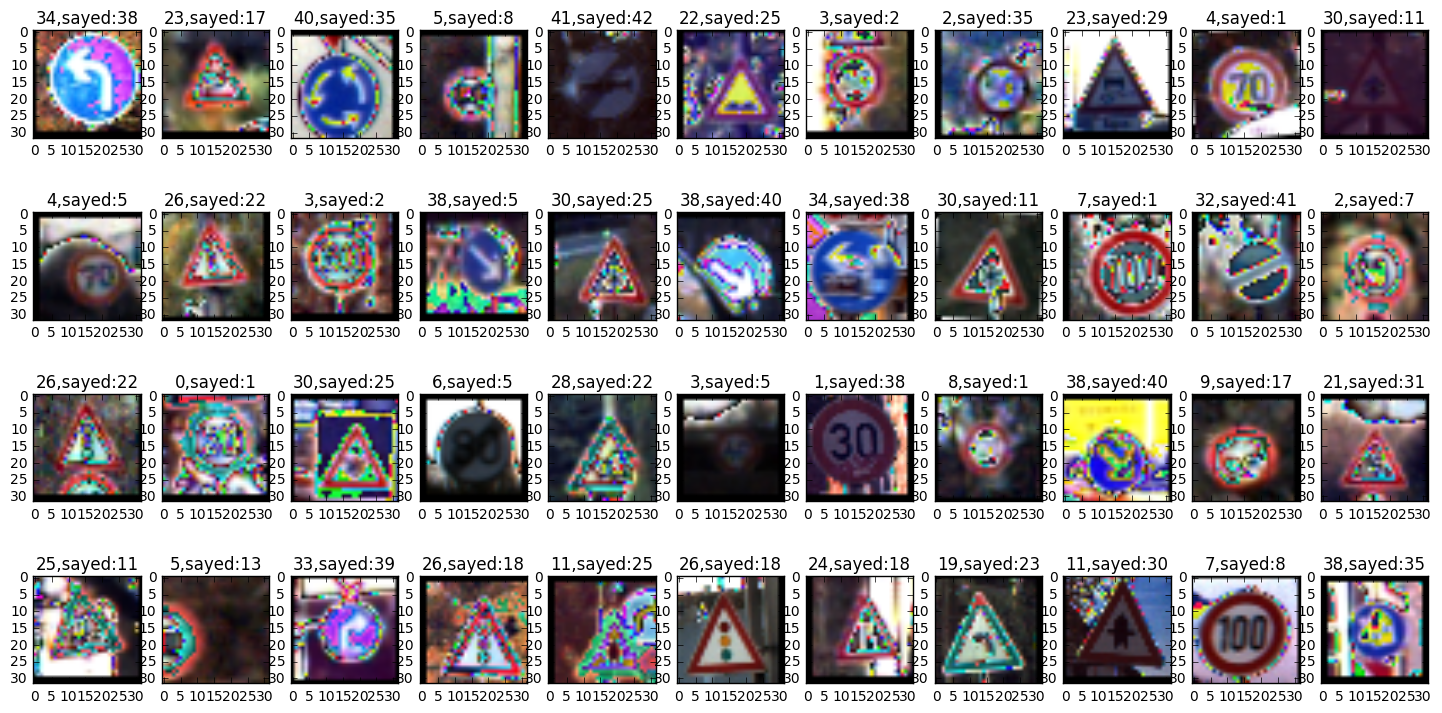

In [15]:
trainer.saver.restore(sess, 'tmp/log/cnn.ckpt')
labels = cnn.labelData(sess, xValidation, trainer)
wrongIndices = []
for i in range(len(labels)):
    if(labels[i] != yValidation[i]): wrongIndices.append(i)
print(1.*len(wrongIndices)/len(labels))

f, axis = plt.subplots(nrows=4, ncols=11)

for i in range(min([len(wrongIndices), 44])):
    imageIndex = wrongIndices[i]
    axis[i//11, i%11].set_title("%d,sayed:%d" % (yValidation[imageIndex], labels[imageIndex]))
    axis[i//11, i%11].imshow(xValidation[imageIndex][:,:,:3])


print("Step:%g Test Accuracy %g" % (globalStep.eval(session = sess), trainer.testAccuracy(sess, xTest, yTest)))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
The model was trained using the Adam optimizer with an exponentially decaying learning rate, starting at 1e-3 and decaying to 1e-4, by halfing every 200 steps. Providing both momentum and decaying learning rate. This way one gets a fastly converging algorithm, which does not get stuck easily in local minima. 

Hereby, every training step was stochastic using a batchs of 1024 samples. This provides a good stochastic approximation of the real data set while providing regularisation dur to the random selection of the samples. Every 10 training steps the accuracy against the validation set is checked. If the not more than 30 examples in the validation set are evaluated correctly in addtion to the ones at the last checkpoint within 100 steps the training is aborted.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started by normalising the data to a mean of 0 and a maxdev of 1.
Then I implemented a simple convolutional network with two convolutional layers and a fully connected layer with 1024 neurons to get a baseline value for the accuracy, beign 86,3%.
Afterwards, I implemented a small version of the Google LeNet using a convolutional input layers (with 'VALID' padding to save some computations later) and then a inception layer, a convolutional layer and again an inception layer. Each inception layer outputs its infos to the final layer which is fully connected layer with a width of 1024. Then, the incorrectly classified examples of the validation set were investigated.
After investigating the bad classified pictures, I decided to add a greyscale channel to the image to provide a guidline for better edge detection. Furthermore, I decided to renormalise the data to have a mean of 0 and a dev of 1. This increases the contrast of the pictures and makes classification easier, especially for dark pictures. Furthermore, I added an augmented version of the pictures showing the signs smaller, as smaller signs appeared often in the incorrectly classified pictures.
During all those these steps the learning rate behaviour was adapted from time to time to provide better convergence behaviour to the model.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimage
folderPath = "testImages/snippets"
paths=['11.png', '7.png','2.png', '5.png', '9.png']
#paths = os.listdir(folderPath)
numberOfPics = len(paths)
pictures = []
for path in paths:
    if(path.endswith('.png')):
        img = mpimage.imread(folderPath+"/"+path)
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        img = cv2.resize(img, (32,32))
        img = cv2.convertScaleAbs(img, alpha=(255.0))
        pictures.append(img)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The following 5 images were choosen. They are hard to classify as they have either stickers on them (picture 1-3, a typical problem in Hamburg downtown :D) or because they are tilted strongly (picture 4) or a sign which is similar but not the same as the ones in the training set (picture 5). This is more of an urban problem challenge compared to other possibilities like special brightness or contrast of the image but they are wiedly covered in the test set.

0 255


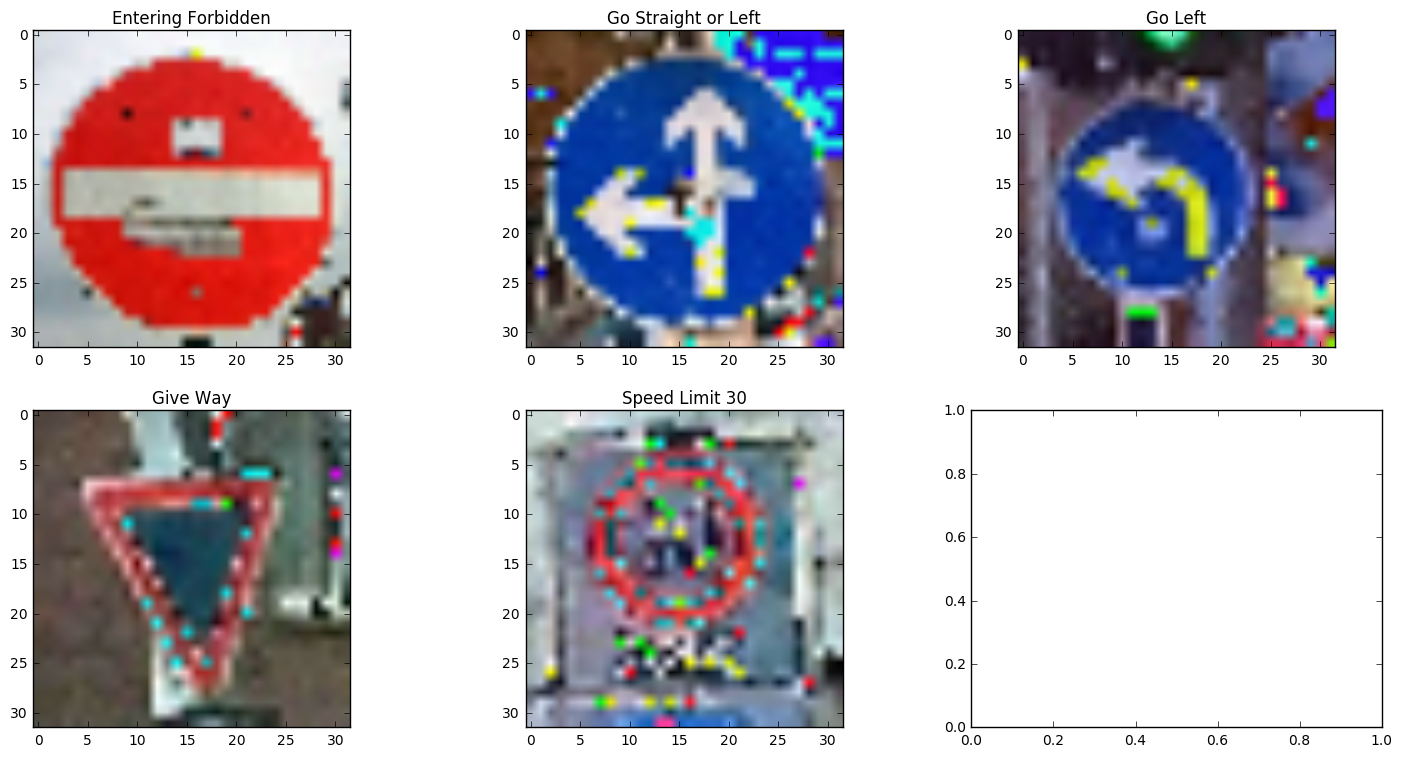

In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
pictures = np.array(pictures)
processPics = preprocessImages(pictures)
labels = cnn.labelData(sess, processPics, trainer)
numberOfPics += numberOfPics%2
f, ax = plt.subplots(nrows = 2, ncols = numberOfPics//2)
print(minValImage(pictures),maxValImage(pictures))
for i in range(len(paths)):
    ax[i//(numberOfPics//2),i%(numberOfPics//2)].set_title(trafficSignDict.get(labels[i]))
    ax[i//(numberOfPics//2),i%(numberOfPics//2)].imshow(processPics[i][:,:,:3])





### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model is not as good as classifying the newly taken pictures compared to the ones in the test set. This originates in the fact, that I took quite uncommon examples of street signs when compared to the overall street sign occurence in Germany. However the algorithm seems to be quite robust against some distortions.
Depending on the training cycle I had some different missclasifcations of the pictures.

**Picture 1:** Was sometimes classified correctly, but 1 time as well as a 70 speed limit sign. This could originate from the stickers adding white spaces to the sign. I would have expected a drive-through forbidden as well, but it did not occur till now.

**Picture 2:** Was always classified correctly, as the stickers doesn't change the overall look-alike of the picture.

**Picture 3:** Changed depending on the training circumstances. One time it was classified as go right around this obstacle, as the sticker in the middle makes it probable to see an arrow pointing down to the right. 

**Picture 4:** Was always classified correctly, so tilting does not seem that much of a problem.

**Picture 5:** Was mostly classified as 30 speed limit sign. Which is not that far away from the truth taking into account that the sign wasn't at all in the trianing set. Furthermore, a 30 sign is more likely to appear as the 20 sign is quite rare in the training distribution. Therefore, the algorithm seems to tend towards 30 signs. In addition it was one time classified as a stop sign which seems interesting.

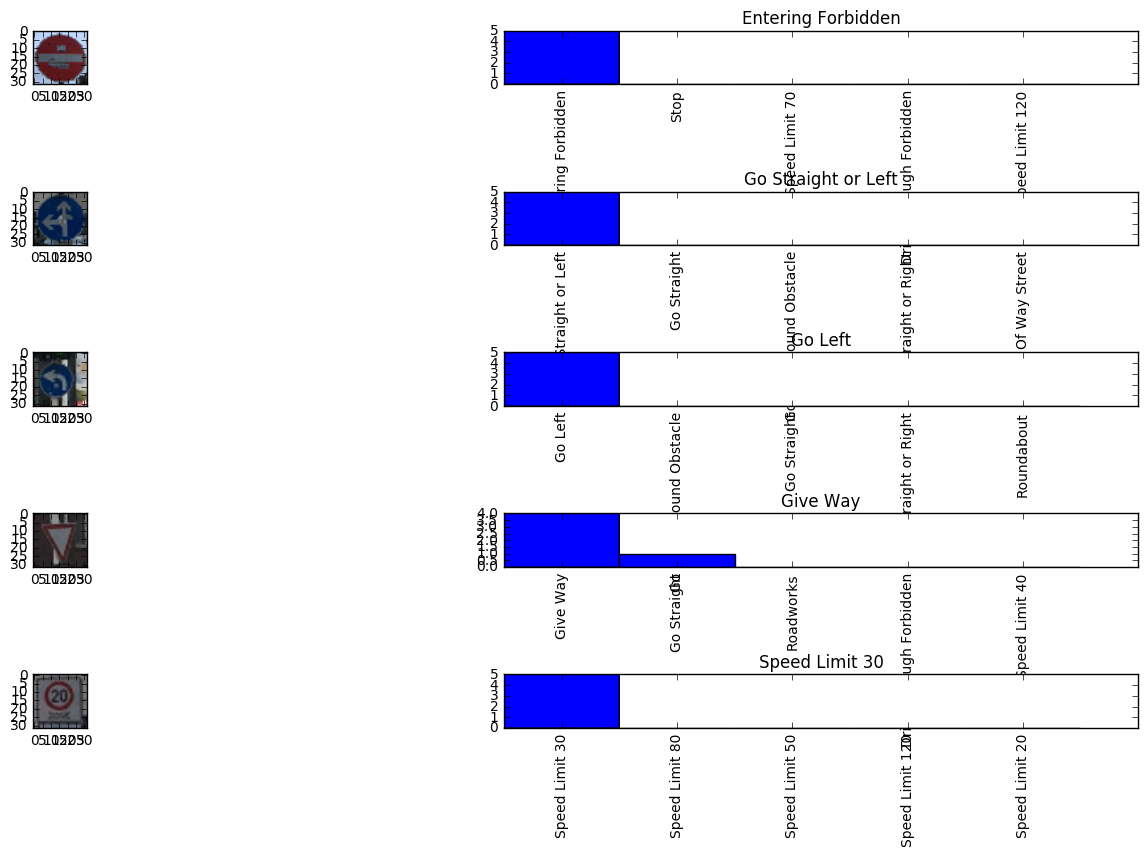

In [28]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
topK = cnn.topK(sess, processPics, trainer, 5)
f, ax = plt.subplots(nrows = 5, ncols = 2)
plt.subplots_adjust(hspace=2)
for i in range(len(labels)):
    ax[i,0].imshow(pictures[i])
    arr = np.array(range(6))
    ax[i,1].set_title(trafficSignDict.get(labels[i]))
    ax[i,1].hist(topK[i,0],arr)
    arr = arr+.5
    plt.sca(ax[i,1])
    plt.xticks(arr, [trafficSignDict.get(number) for number in topK[i,1]], rotation=90)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** It can be seen, that the correct sign apperas always in the top 5. Actually even in the top 2. 
This even holds for picture 5, which is a sign which is only similar to the training data. 
What can be seen as well is, that the model is extremly certain, when it comes to the "give way"-sign. This seems reasonable, as it has a quite unique shape and is therefore easy to classify.
This is completly different from picture 2, where the sticker on the sign gave in earlier versions of the classifier rice to a head to head race between "go left" and "go right around this obstacle" as the sticker gives rise to the assumption of an arrow going from the top left to the bottom right.
Interesting is the second place in the classification of the fourth image, as a tilted give way sign seems quite different from a go straight sign.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.